# Exploratory Activity 10: Principal Component Analysis of Radiative Forcing Data

*adapted from [GEOG 595: Geographic Data Analysis](https://pjbartlein.github.io/GeogDataAnalysis/lec16.html) by Prof. Patrick Bartein*

Today we will use principal component analysis to examine annual changes in the radiative forcing associated with 11 environmental variables since the year 1750, as calculated in the Intergovernmental Panel on Climate Change’s [Fifth Assessment Report](http://www.ipcc-data.org/observ/index.html):

<ul>
  <li>solar activity</li>
  <li>stratospheric ozone</li>
  <li>stratospheric water vapor</li>
  <li>volcanic activity</li>
  <li>contrails</li>
  <li>tropospheric ozone</li>
 <li>total aerosol</li>
 <li>black carbon deposition on snow</li>
 <li>land use changes</li>
 <li>carbon dioxide</li>
 <li>other greenhouse gases</li>
</ul>


__10.1 Calculating Eigenvectors__

**Question 10.1.1** As you have learned, Earth's climate system contains many interdependencies and feedbacks, and thus it is useful to ascertain which environmental factors are closely correlated and which assert their own distinct forcing on the Earth's energy balance. Based on your understanding of the environmental factors provided, make a qualitative prediction about which you expect to be closely correlated and which you expect to behave in their own distinct manner.


Now we will consult the IPCC data to make a quantitative assessment of the qualitative prediction you made above. Use the code below to load and trim the radiative forcing data.


In [75]:
# import some useful libraries
from scipy.io import loadmat
import numpy as np

# load the data
data = loadmat('data/RadForcing.mat')
X = data['RadForcing']

# remove first column, which contains unnecessary year labels
X = X[:,1:]

# display the number of rows and columns in the data variable X
X.shape

(262, 11)

You will see that the data matrix "X" contains 11 variables (as expected), with 262 observations each (as the IPCC report contains calculations through 2011). For the purposes of interpretability that will become clear later on, use the code below to invert the signs of two of these variables.

In [76]:
# invert the signs of the fourth and eleventh variables
X[:,3] = -X[:,3]
X[:,10] = -X[:,10]
X

array([[ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         1.000e-03],
       [-2.300e-02,  4.000e-03,  0.000e+00, ...,  0.000e+00, -1.400e-02,
        -0.000e+00],
       [-2.400e-02,  6.000e-03,  1.000e-03, ...,  0.000e+00, -2.900e-02,
        -0.000e+00],
       ...,
       [ 1.762e+00,  9.990e-01,  3.990e-01, ...,  4.400e-02, -2.700e-02,
         1.250e-01],
       [ 1.789e+00,  1.005e+00,  4.000e-01, ...,  4.800e-02,  1.000e-03,
         1.000e-01],
       [ 1.816e+00,  1.015e+00,  4.000e-01, ...,  5.000e-02,  3.000e-02,
         1.250e-01]])

**Question 10.1.2** Next, normalize the data into "standard units."

In [78]:
X = np.array(X)
X_normalized = []
for i in range(0,11):
    X_normalized.append((X[:,i]-np.mean(X[:,i]))/np.std(X[:,i]))
X_normalized = np.transpose(np.array(X_normalized))

**Question 10.1.3** Next, compute the covariance matrix of the normalized data matrix, defined as 𝜮 below. Here, m is the number of observations in each column and the superscript T indicates the transpose of a matrix.


<img src="https://latex.codecogs.com/svg.latex?\Large&space;\sum=\frac{1}{m}X^TX" title="" />

*Hint: You may find the functions np.transpose and np.dot useful!*

In [90]:
X_cov = (np.dot(np.transpose(X_normalized),X_normalized))/262

Finally, use the code below to run a built-in numpy function that will obtain the eigenvectors and eigenvalues of the covariance matrix:

In [100]:
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html
eigen_vals, eigen_vecs = np.linalg.eig(X_cov)
eigen_vals

array([8.51982864e+00, 1.07477988e+00, 9.20011242e-01, 3.91707038e-01,
       6.50157896e-02, 1.63608437e-02, 7.74967673e-03, 2.40148954e-03,
       1.44917826e-03, 1.58414356e-04, 5.37802083e-04])

The output variable "eigen_vecs" above gives the "principal components" of the normalized data matrix, the axes or directions which explain the most variance in the original data set.

## 10.2 Dimensionality Reduction

While 11 eigenvectors were calculated, not all of them are equally important in explaining the variance in the data. Thus, by selecting a subset of the eigenvectors, we can reduce the dimensionality of the original data set. This raises the question: how many eigenvectors should you preserve?


**Question 10.2.1** The magnitude of the corresponding eigenvalues gives a measure of the importance of each eigenvector. Calculate the percent of the total variance explained by each eigenvector by dividing each individual eigenvalue by the sum of all the eigenvalues.


In [101]:
per_tot_var = abs(eigen_vals)/np.sum(abs(eigen_vals))*100
per_tot_var

array([7.74529877e+01, 9.77072621e+00, 8.36373856e+00, 3.56097308e+00,
       5.91052633e-01, 1.48734943e-01, 7.04516067e-02, 2.18317231e-02,
       1.31743478e-02, 1.44013050e-03, 4.88910984e-03])

**Question 10.2.2** Use the percent of the total variance explained by each eigenvector to make a plot of the "cumulative variance" explained by the first *n* eigenvectors (i.e., the percent of the total variance explained by each eigenvector plus the percentages explained by the eigenvectors before it). 

*Note: Python does not necessarily report the eigenvectors in order of importance, so it would be wise to sort the percent variance variable from highest to lowest before making the cumulative variance plot.*

[-7.74529877e+01 -9.77072621e+00 -8.36373856e+00 -3.56097308e+00
 -5.91052633e-01 -1.48734943e-01 -7.04516067e-02 -2.18317231e-02
 -1.31743478e-02 -4.88910984e-03 -1.44013050e-03]
[77.45298766162931, 87.22371387025693, 95.5874524300681, 99.14842550673967, 99.73947813925838, 99.888213082064, 99.95866468872764, 99.98049641182978, 99.99367075965341, 99.99855986949531, 100.0]


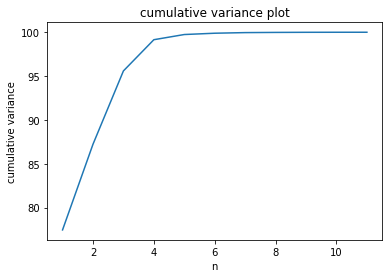

In [82]:
## ENTER CODE HERE

per_tot_var_sort = np.sort(-abs(per_tot_var))
print(per_tot_var_sort)
per_tot_var_sort = -per_tot_var_sort
cumulative_var = [0 for x in range(0,11)]
array = np.arange(0,11)
for n in array:
    cumulative_var[n] = np.sum(per_tot_var_sort[0:n+1])
print(cumulative_var)
from matplotlib import pyplot as plt 
x = np.arange(1,12) 
y = cumulative_var
plt.title("cumulative variance plot") 
plt.xlabel("n") 
plt.ylabel("cumulative variance") 
plt.plot(x,y) 
plt.show()

**Question 10.2.3** The choice of how many eigenvectors to preserve depends on the data set and your particular goals, but many data scientists choose to preserve however many principal components are necessary to explain 95-99% of the total variance. Using this criteria, how many eigenvectors should you preserve in your case?


**Question 10.2.4** Examine the principal components you've selected by printing the first n columns of your "eigen_vecs" variable below.


In [92]:
print(eigen_vecs[:,0:3])

[[-0.33934691 -0.05813368  0.06153766]
 [-0.33779018 -0.10449903  0.10912052]
 [-0.34152215 -0.0276253   0.00236379]
 [-0.31335144 -0.23272703  0.25348942]
 [ 0.34009062  0.00918847  0.03197422]
 [ 0.33271165 -0.09711291  0.14836474]
 [-0.34122983  0.00287767 -0.0231774 ]
 [-0.28765554  0.2796968  -0.35468501]
 [-0.29123007 -0.294361    0.37560691]
 [-0.2127714   0.47053413 -0.41650742]
 [ 0.01691625 -0.73141692 -0.67536011]]


## 10.3 Analyzing the Loadings of the Principal Components

By themselves, these principal components are not particularly informative. It would be useful to know how they relate to each of the environmental variables in the original data set.

To obtain this information, we "load" the magnitude of the eigenvalues onto direction indicated by the unit eigenvectors (all with lengths of 1). The resultant "loadings," calculated by the code below, describe the covariances between the original variables and the principal components.


In [93]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

**Question 10.3.1** Print the first column of the "loadings" variable to display the covariance of the first principal component with each of the 11 environmental variables.


In [94]:
print(loadings[0,:])

[-0.99051106 -0.06026811  0.05902521 -0.04242859 -0.07146649  0.05942388
  0.01519013 -0.02992779  0.01411396  0.00237722 -0.00123136]


**Question 10.3.2** Which environmental variables appear to be contained in this first principal component (i.e., which exhibit high covariances with the first eigenvector)? Which environmental variables seem unrelated to this principal component? Note that the environmental variables in the original data matrix you imported are not in any particular order relative to the list provided at the beginning of this activity; just refer to them by their column indices for now.


*Hint: It is the absolute value of the loading that indicates covariance; sign is unimportant.*


**Question 10.3.3** Also examine the loadings of the other principal components you decided to preserve. Which environmental variables exhibit high covariances with these eigenvectors?


In [86]:
print(loadings[1,:])
print(loadings[2,:])
print(loadings[3,:])
print(loadings[4,:])
print(loadings[5,:])
print(loadings[6,:])
print(loadings[7,:])
print(loadings[8,:])
print(loadings[9,:])
print(loadings[10,:])

[-0.98596716 -0.10833581  0.10466537  0.03578351  0.04808633  0.02751697
 -0.0251499   0.00461597  0.00812018 -0.00996221 -0.00288448]
[-0.99686031 -0.02863959  0.00226729 -0.03491099  0.0468146  -0.02777414
 -0.02831309  0.01075141  0.01069748  0.00558893 -0.01412348]
[-0.91463355 -0.24127181  0.24314     0.16030153  0.13099485  0.03504072
  0.04282955  0.01027914 -0.00917689  0.00237599  0.00153166]
[ 9.92681853e-01  9.52582960e-03  3.06687792e-02  6.80403030e-02
 -3.68416267e-02  8.15529182e-02 -2.33823917e-02  4.31253044e-03
 -1.56261557e-02  8.73839410e-04 -1.01726230e-02]
[ 0.97114357 -0.1006785   0.14230733  0.15447181  0.01147875  0.03506005
 -0.0197294   0.01641186  0.02289089  0.00272476  0.00895026]
[-0.99600707  0.00298333 -0.02223112 -0.04771756  0.0402168   0.01012551
 -0.055445   -0.00884082 -0.01342867  0.00288845  0.01135464]
[-8.39630437e-01  2.89966118e-01 -3.40203989e-01 -2.99918204e-01
 -5.19389437e-02  4.01171663e-02  1.52533511e-02  2.64286754e-02
  8.30014659e-0

**Question 10.3.4** Verify the conclusions of your loading analysis above by making a time series of the radiative forcing attributed to each environmental factor during the 1750-2011 time period.


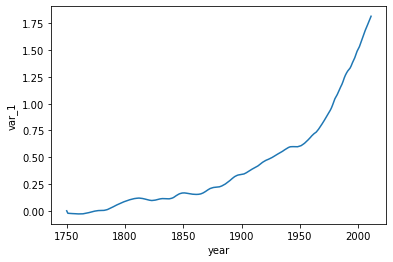

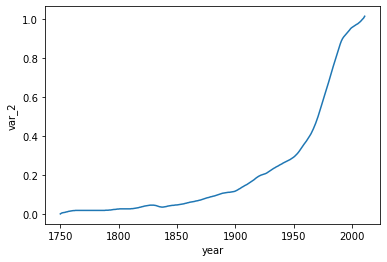

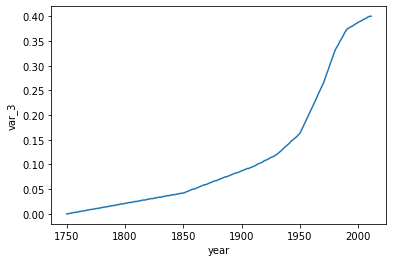

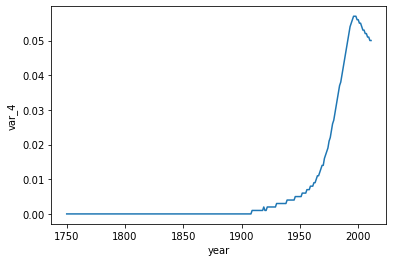

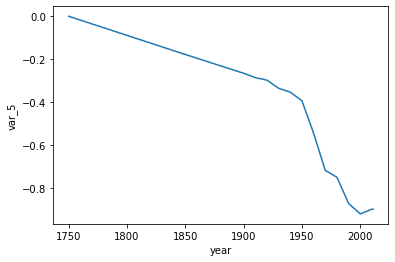

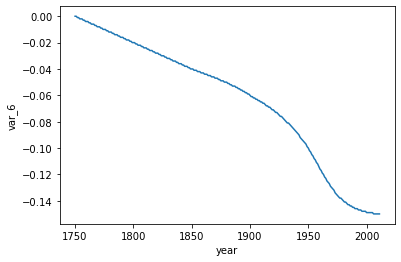

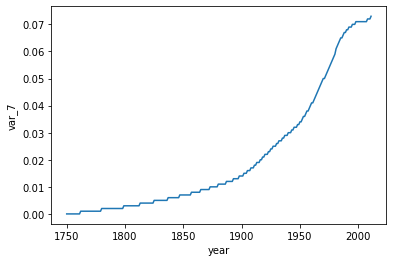

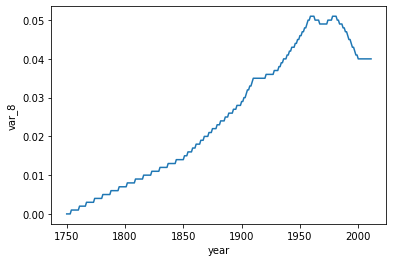

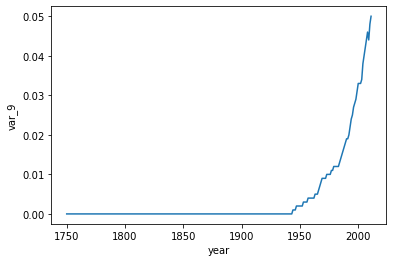

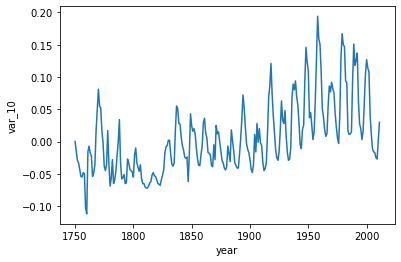

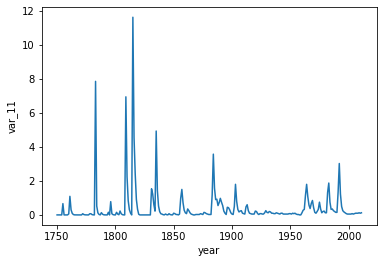

In [89]:
year = np.arange(1750,2012)
factor_1 = X[:,0]
from matplotlib import pyplot as plt 
x = year 
y = factor_1
plt.xlabel("year") 
plt.ylabel("var_1") 
plt.plot(x,y) 
plt.show()

factor_2 = X[:,1]
from matplotlib import pyplot as plt 
x = year 
y = factor_2
plt.xlabel("year") 
plt.ylabel("var_2") 
plt.plot(x,y) 
plt.show()

factor_3 = X[:,2]
from matplotlib import pyplot as plt 
x = year 
y = factor_3 
plt.xlabel("year") 
plt.ylabel("var_3") 
plt.plot(x,y) 
plt.show()

factor_4 = X[:,3]
from matplotlib import pyplot as plt 
x = year 
y = factor_4
plt.xlabel("year") 
plt.ylabel("var_4") 
plt.plot(x,y) 
plt.show()

factor_5 = X[:,4]
from matplotlib import pyplot as plt 
x = year 
y = factor_5
plt.xlabel("year") 
plt.ylabel("var_5") 
plt.plot(x,y) 
plt.show()

factor_6 = X[:,5]
from matplotlib import pyplot as plt 
x = year 
y = factor_6
plt.xlabel("year") 
plt.ylabel("var_6") 
plt.plot(x,y) 
plt.show()

factor_7 = X[:,6]
from matplotlib import pyplot as plt 
x = year 
y = factor_7
plt.xlabel("year") 
plt.ylabel("var_7") 
plt.plot(x,y) 
plt.show()

factor_8 = X[:,7]
from matplotlib import pyplot as plt 
x = year 
y = factor_8
plt.xlabel("year") 
plt.ylabel("var_8") 
plt.plot(x,y) 
plt.show()

factor_9 = X[:,8]
from matplotlib import pyplot as plt 
x = year 
y = factor_9
plt.xlabel("year") 
plt.ylabel("var_9") 
plt.plot(x,y) 
plt.show()

factor_10 = X[:,9]
from matplotlib import pyplot as plt 
x = year 
y = factor_10
plt.xlabel("year") 
plt.ylabel("var_10") 
plt.plot(x,y) 
plt.show()

factor_11 = X[:,10]
from matplotlib import pyplot as plt 
x = year 
y = factor_11
plt.xlabel("year") 
plt.ylabel("var_11") 
plt.plot(x,y) 
plt.show()

**Question 10.3.5** Do the environmental factors that exhibited high covariances with the first principal component appear somewhat correlated over time? Do the environmental factors that exhibited low covariances with the first principal component appear uncorrelated with the other variables? Be sure to mention if there are any major discrepancies between your loadings-based conclusions and your visual analysis that cannot be easily explained.


**Discussion Questions.** Pair up with a partner and discuss the following.

1. The environmental variable names in the actual order in which they appear in the RadForcing.csv data matrix (column 0 to column 10) are: carbon dioxide, other greenhouse gases, tropospheric ozone, stratospheric ozone, total aerosol, land use changes, stratospheric water vapor, black carbon deposition on snow, contrails, volcanic activity, and solar activity.
    * Given this information, which environmental factors (by name) exhibited the highest covariance with your first principal component? Did you partner come to the same conclusion? If not, try to identify the difference(s) in your approaches that may have led to this discrepancy.
    * Do the variables associated quantitatively with your first principal component align with those you qualitatively predicted to be well correlated with one another at the beginning of this exercise? If not, explain.
    * As you know, correlation does not necessarily imply causation. Are there any environmental factors that the principal component analysis identifies as correlated that you suspect indicate temporal coincidences rather than causal relationships?
2. Make a new normalized data matrix containing only the environmental variables you expected to be well correlated in your initial qualitative prediction. Calculate the covariance matrix of this new data matrix, and then compute the eigenvalues and eigenvectors for this new covariance matrix.
    * Based on the cumulative variance explained by each subsequent principal component, how many eigenvectors would you choose to preserve in this case?
    * Is the number of principal components preserved larger or smaller than when you analyzed the entire data set? Does your answer make sense, given the criteria by which you excerpted your data matrix? 
    * What answer would you expect to get if you truncated the normalized data matrix in a different way?
3. This activity represents just one of many possible applications of principal component analysis to atmospheric science, and not even the most common one! If there is time, peruse the publications below to learn about other examples of principal component analyses in action in geophysical data exploration.
    * [Identifying Surface Climate Variations](https://journals.ametsoc.org/doi/pdf/10.1175/1520-0442%281993%29006%3C1743%3ASCVOTN%3E2.0.CO%3B2)
    * [Characterizing CO2 Interannual Variability](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2001GL014419)
    * [Evaluating Instrument Performance](https://journals.ametsoc.org/doi/pdf/10.1175/JTECH-D-15-0085.1)

[-72.32194501 -19.0453044   -8.10002363  -0.53272695]
[72.32194501045602, 91.36724941139235, 99.46727304543712, 100.0]


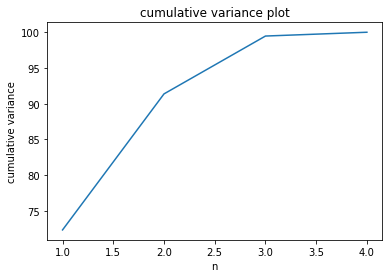

In [105]:
index = [6,7,8,9]
X_new = X_normalized[:,index]
X_new_cov = (np.dot(np.transpose(X_new),X_new))/262
eigen_new_vals, eigen_new_vecs = np.linalg.eig(X_new_cov)
eigen_new_vals
per_new_tot_var = abs(eigen_new_vals)/np.sum(abs(eigen_new_vals))*100
per_new_tot_var
per_new_tot_var_sort = np.sort(-abs(per_new_tot_var))
print(per_new_tot_var_sort)
per_new_tot_var_sort = -per_new_tot_var_sort
cumulative_new_var = [0 for x in range(0,4)]
array = np.arange(0,4)
for n in array:
    cumulative_new_var[n] = np.sum(per_new_tot_var_sort[0:n+1])
print(cumulative_new_var)
from matplotlib import pyplot as plt 
x = np.arange(1,5) 
y = cumulative_new_var
plt.title("cumulative variance plot") 
plt.xlabel("n") 
plt.ylabel("cumulative variance") 
plt.plot(x,y) 
plt.show()

I would still choose 3 eigenvectors.